In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
Train_data = 'https://drive.google.com/uc?id=1iDU9ysyoQ_RWPMSvWOg1-xBgtj2wzvGz&export=download'
Test_data = 'https://drive.google.com/uc?id=1Hei17WH2oEpSYWrS7PuiH0n9gI3LHB4G&export=download'
Sample_submission = 'https://drive.google.com/uc?id=16yA5FEZZOFZddbpn2nm1woWK9gFtG0nl&export=download'
df = pd.read_csv(Train_data)

In [ ]:
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [ ]:
print("shape of dataset")
print(df.shape)
print("columns in dataset")
print(df.columns)
print(df.info())

shape of dataset
(12227, 17)
columns in dataset
Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12227 non-null  int64  
 1   acousticness      12227 non-null  float64
 2   danceability      12227 non-null  float64
 3   energy            12227 non-null  float64
 4   explicit          12227 non-null  object 
 5   instrumentalness  12227 non-null  float64
 6   key               12227 non-null  int64  
 7   liveness          12227 non-null  float64
 8   loudness          12227 non-null  float64
 9   mode              12227 non-null  object 
 10  release_date   

In [ ]:
df['explicit']= pd.factorize(df.explicit)[0]
print(df.explicit.value_counts())

df['popularity']= pd.factorize(df.popularity)[0]
print(df.popularity.value_counts())

0    10906
1     1321
Name: explicit, dtype: int64
0    3222
1    3118
2    2912
3    2606
4     369
Name: popularity, dtype: int64


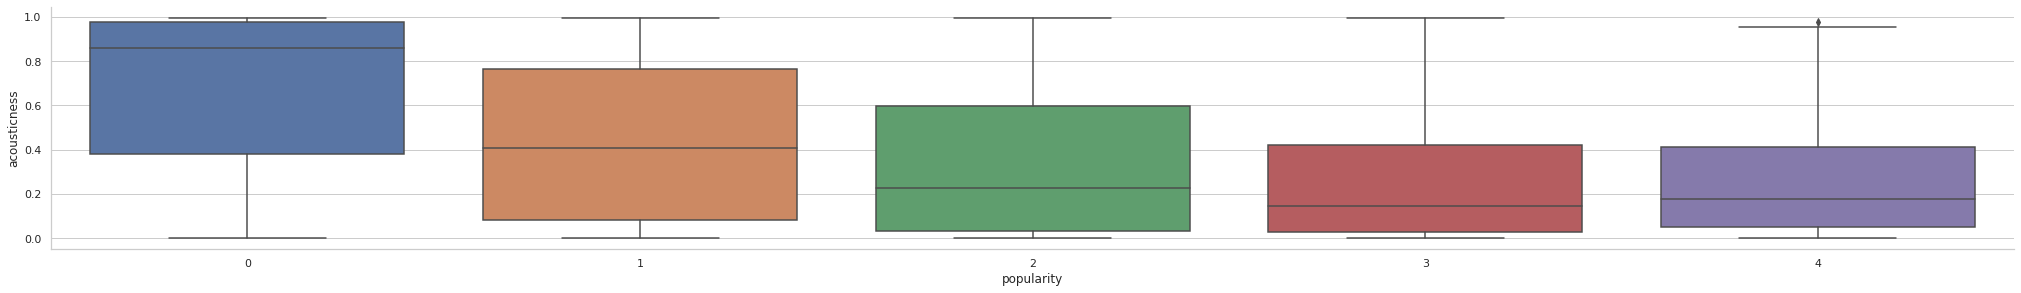

In [ ]:
sns.set(style="whitegrid")
g = sns.catplot(x="popularity", y="acousticness", data=df,kind="box",height=4, aspect=7)
g.set_ylabels("acousticness")

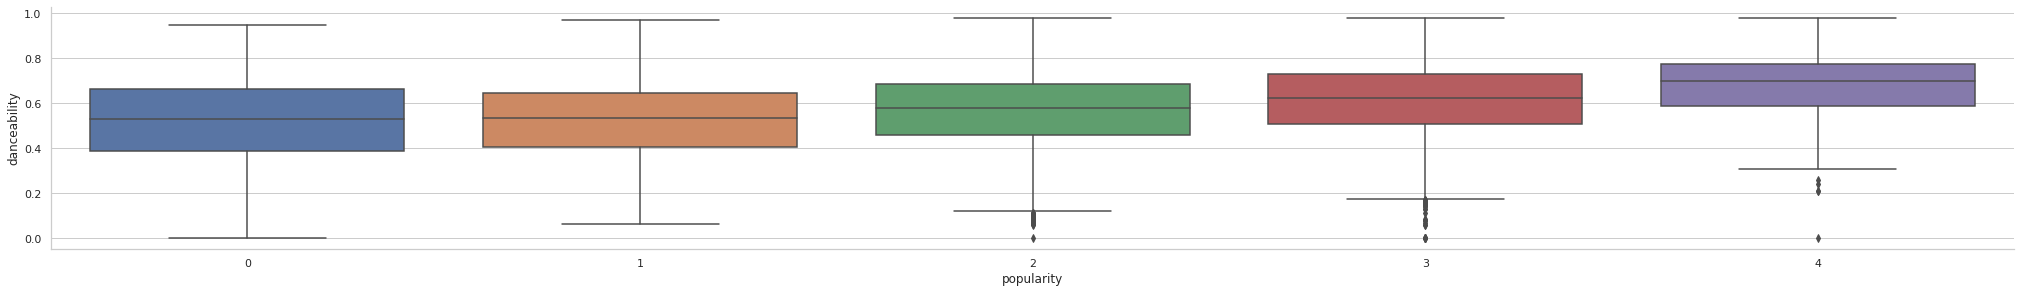

In [ ]:
sns.set(style="whitegrid")
g = sns.catplot(x="popularity", y="danceability", data=df,kind="box",height=4, aspect=7)
g.set_ylabels("danceability")

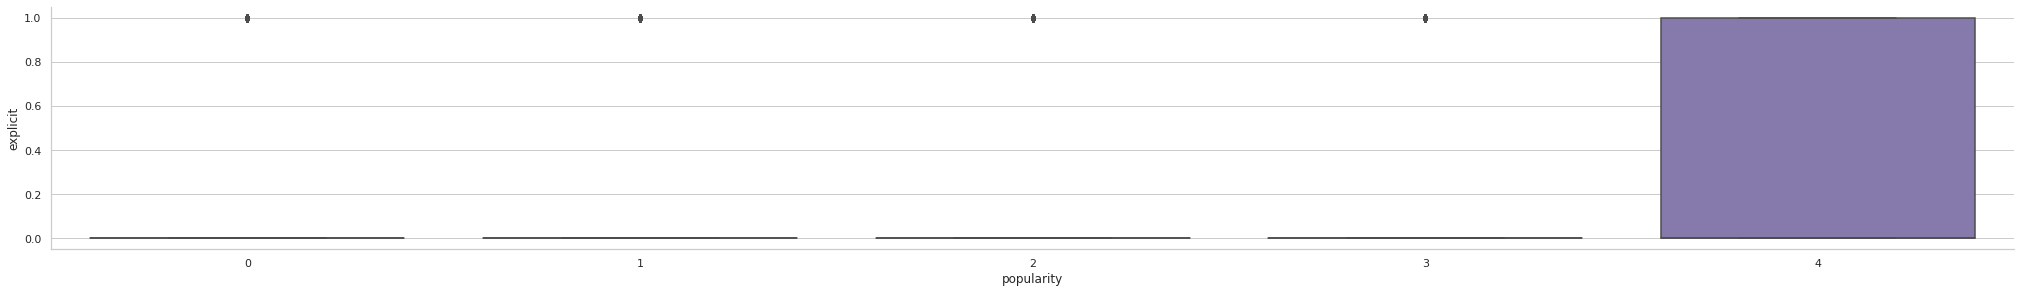

In [ ]:
sns.set(style="whitegrid")
g = sns.catplot(x="popularity", y="explicit", data=df,kind="box",height=4, aspect=7)
g.set_ylabels("explicit")

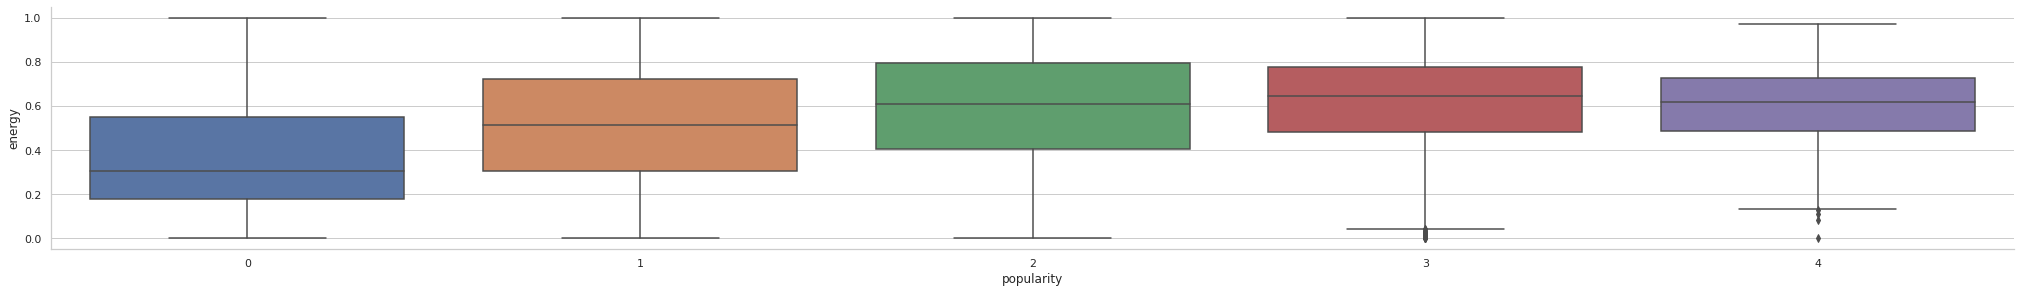

In [ ]:
sns.set(style="whitegrid")
g = sns.catplot(x="popularity", y="energy", data=df,kind="box",height=4, aspect=7)
g.set_ylabels("energy")

Text(0.5, 1.0, 'dependency')

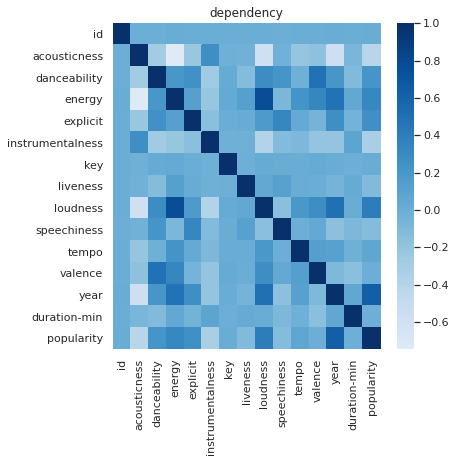

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), center=0, cmap='Blues')
ax.set_title('dependency')

In [ ]:
min(df.corr())

'acousticness'

In [ ]:
max(df.corr())

'year'

Exploring on Year

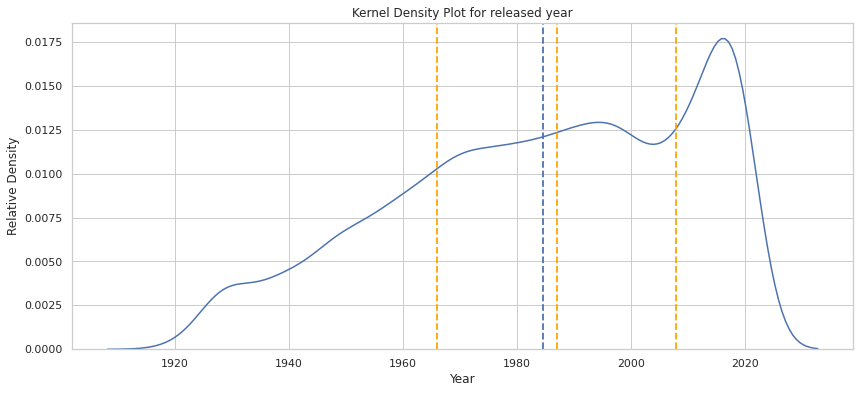

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
#plt.grid(True)
plt.title('Kernel Density Plot for released year')
plt.xlabel('Year')
plt.ylabel('Relative Density')
sns.kdeplot(df["year"])
plt.axvline(df["year"].mean(), linewidth=1.8, linestyle="dashed")
plt.axvline(np.quantile(df["year"],0.25), linewidth=1.8, linestyle="dashed", color="orange")
plt.axvline(np.quantile(df["year"],0.50), linewidth=1.8, linestyle="dashed", color="orange")
plt.axvline(np.quantile(df["year"],0.75), linewidth=1.8, linestyle="dashed", color="orange")

Bucketing for Year

In [ ]:
D0=np.quantile(df["year"],0)
D1=np.quantile(df["year"],0.10)
D2=np.quantile(df["year"],0.20)
D3=np.quantile(df["year"],0.30)
D4=np.quantile(df["year"],0.40)
D5=np.quantile(df["year"],0.50)
D6=np.quantile(df["year"],0.60)
D7=np.quantile(df["year"],0.70)
D8=np.quantile(df["year"],0.80)
D9=np.quantile(df["year"],0.90)
D10=np.quantile(df["year"],1)

In [ ]:
print(D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10)

1920 1947.0 1960.0 1970.0 1979.0 1987.0 1995.0 2003.0 2012.0 2017.0 2021


In [ ]:
df["Year_bucket"]=pd.cut(df["year"],bins = [0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10],
                         labels=["1920-1947","1947-1960",
                                 "1960-1970", "1970-1979",
                                 "1979-1987","1987-1995",
                                 "1995-2003","2003-2012",
                                 "2012-2017","2017-2021"])

In [ ]:
test = pd.read_csv(Test_data)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4000 non-null   int64  
 1   acousticness      4000 non-null   float64
 2   danceability      4000 non-null   float64
 3   energy            4000 non-null   float64
 4   explicit          4000 non-null   object 
 5   instrumentalness  4000 non-null   float64
 6   key               4000 non-null   int64  
 7   liveness          4000 non-null   float64
 8   loudness          4000 non-null   float64
 9   mode              4000 non-null   object 
 10  release_date      4000 non-null   object 
 11  speechiness       4000 non-null   float64
 12  tempo             4000 non-null   float64
 13  valence           4000 non-null   float64
 14  year              4000 non-null   int64  
 15  duration-min      4000 non-null   float64
dtypes: float64(10), int64(3), object(3)
memory

In [ ]:
test['explicit']= pd.factorize(test.explicit)[0]
print(test.explicit.value_counts())

0    3561
1     439
Name: explicit, dtype: int64


In [ ]:
test["Year_bucket"]=pd.cut(test["year"],bins = [0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10],
                         labels=["1920-1947","1947-1960",
                                 "1960-1970", "1970-1979",
                                 "1979-1987","1987-1995",
                                 "1995-2003","2003-2012",
                                 "2012-2017","2017-2021"])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                4000 non-null   int64   
 1   acousticness      4000 non-null   float64 
 2   danceability      4000 non-null   float64 
 3   energy            4000 non-null   float64 
 4   explicit          4000 non-null   int64   
 5   instrumentalness  4000 non-null   float64 
 6   key               4000 non-null   int64   
 7   liveness          4000 non-null   float64 
 8   loudness          4000 non-null   float64 
 9   mode              4000 non-null   object  
 10  release_date      4000 non-null   object  
 11  speechiness       4000 non-null   float64 
 12  tempo             4000 non-null   float64 
 13  valence           4000 non-null   float64 
 14  year              4000 non-null   int64   
 15  duration-min      4000 non-null   float64 
 16  Year_bucket       4000 n

Exploring Released Month 

In [ ]:
### Extracting month

df["released_month"]=""
released_month=[]
for row in range(0, len(df),1):
  released_month.append(df.iloc[row]["release_date"][3:5])

df["released_month"]=released_month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                12227 non-null  int64   
 1   acousticness      12227 non-null  float64 
 2   danceability      12227 non-null  float64 
 3   energy            12227 non-null  float64 
 4   explicit          12227 non-null  int64   
 5   instrumentalness  12227 non-null  float64 
 6   key               12227 non-null  int64   
 7   liveness          12227 non-null  float64 
 8   loudness          12227 non-null  float64 
 9   mode              12227 non-null  object  
 10  release_date      12227 non-null  object  
 11  speechiness       12227 non-null  float64 
 12  tempo             12227 non-null  float64 
 13  valence           12227 non-null  float64 
 14  year              12227 non-null  int64   
 15  duration-min      12227 non-null  float64 
 16  popularity        1222

In [ ]:
##test

test["released_month"]=""
released_month=[]
for row in range(0, len(test),1):
  released_month.append(test.iloc[row]["release_date"][3:5])

test["released_month"]=released_month
test["released_month"]=test["released_month"].astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                4000 non-null   int64   
 1   acousticness      4000 non-null   float64 
 2   danceability      4000 non-null   float64 
 3   energy            4000 non-null   float64 
 4   explicit          4000 non-null   int64   
 5   instrumentalness  4000 non-null   float64 
 6   key               4000 non-null   int64   
 7   liveness          4000 non-null   float64 
 8   loudness          4000 non-null   float64 
 9   mode              4000 non-null   object  
 10  release_date      4000 non-null   object  
 11  speechiness       4000 non-null   float64 
 12  tempo             4000 non-null   float64 
 13  valence           4000 non-null   float64 
 14  year              4000 non-null   int64   
 15  duration-min      4000 non-null   float64 
 16  Year_bucket       4000 n

In [ ]:
df["released_month"]=df["released_month"].astype(int)

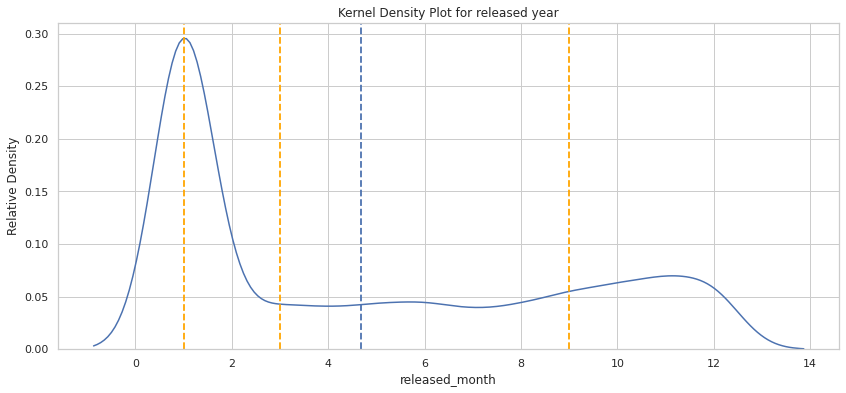

In [ ]:
plt.figure(figsize=(14, 6))
#plt.grid(True)
plt.title('Kernel Density Plot for released year')
plt.xlabel('released_month')
plt.ylabel('Relative Density')
sns.kdeplot(df["released_month"])
plt.axvline(df["released_month"].mean(), linewidth=1.8, linestyle="dashed")
plt.axvline(np.quantile(df["released_month"],0.25), linewidth=1.8, linestyle="dashed", color="orange")
plt.axvline(np.quantile(df["released_month"],0.50), linewidth=1.8, linestyle="dashed", color="orange")
plt.axvline(np.quantile(df["released_month"],0.75), linewidth=1.8, linestyle="dashed", color="orange")

Exploring Duration-min

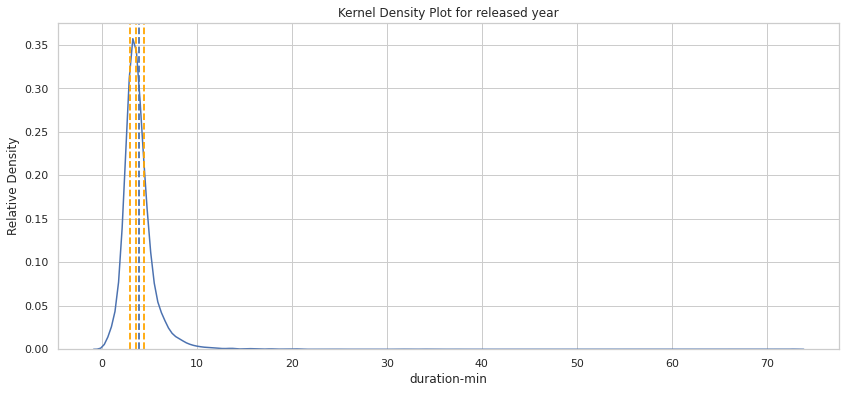

In [ ]:
plt.figure(figsize=(14, 6))
#plt.grid(True)
plt.title('Kernel Density Plot for released year')
plt.xlabel('duration-min')
plt.ylabel('Relative Density')
sns.kdeplot(df["duration-min"])
plt.axvline(df["duration-min"].mean(), linewidth=1.8, linestyle="dashed")
plt.axvline(np.quantile(df["duration-min"],0.25), linewidth=1.8, linestyle="dashed", color="orange")
plt.axvline(np.quantile(df["duration-min"],0.50), linewidth=1.8, linestyle="dashed", color="orange")
plt.axvline(np.quantile(df["duration-min"],0.75), linewidth=1.8, linestyle="dashed", color="orange")

Bucketing for Duration


In [ ]:
D0=np.quantile(df["duration-min"],0)
D1=np.quantile(df["duration-min"],0.10)
D2=np.quantile(df["duration-min"],0.20)
D3=np.quantile(df["duration-min"],0.30)
D4=np.quantile(df["duration-min"],0.40)
D5=np.quantile(df["duration-min"],0.50)
D6=np.quantile(df["duration-min"],0.60)
D7=np.quantile(df["duration-min"],0.70)
D8=np.quantile(df["duration-min"],0.80)
D9=np.quantile(df["duration-min"],0.90)
D10=np.quantile(df["duration-min"],1)
print(D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10)

0.2 2.3 2.7 3.0 3.3 3.6 3.8 4.2 4.7 5.6 72.8


In [ ]:
df["Duration_bucket"]=pd.cut(df["duration-min"],bins = [0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10],
                         labels=["0.2-2.3","2.3-2.7",
                                 "2.7-3.0", "3.0-3.3",
                                 "3.3-3.6","3.6-3.8",
                                 "3.8-4.2","4.2-4.7",
                                 "4.7-5.6","5.6-72.8"])

In [ ]:
## test
test["Duration_bucket"]=pd.cut(test["duration-min"],bins = [0,D1,D2,D3,D4,D5,D6,D7,D8,D9,81],
                         labels=["0.2-2.3","2.3-2.7",
                                 "2.7-3.0", "3.0-3.3",
                                 "3.3-3.6","3.6-3.8",
                                 "3.8-4.2","4.2-4.7",
                                 "4.7-5.6","5.6-72.8"])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                4000 non-null   int64   
 1   acousticness      4000 non-null   float64 
 2   danceability      4000 non-null   float64 
 3   energy            4000 non-null   float64 
 4   explicit          4000 non-null   int64   
 5   instrumentalness  4000 non-null   float64 
 6   key               4000 non-null   int64   
 7   liveness          4000 non-null   float64 
 8   loudness          4000 non-null   float64 
 9   mode              4000 non-null   object  
 10  release_date      4000 non-null   object  
 11  speechiness       4000 non-null   float64 
 12  tempo             4000 non-null   float64 
 13  valence           4000 non-null   float64 
 14  year              4000 non-null   int64   
 15  duration-min      4000 non-null   float64 
 16  Year_bucket       4000 n

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                12227 non-null  int64   
 1   acousticness      12227 non-null  float64 
 2   danceability      12227 non-null  float64 
 3   energy            12227 non-null  float64 
 4   explicit          12227 non-null  int64   
 5   instrumentalness  12227 non-null  float64 
 6   key               12227 non-null  int64   
 7   liveness          12227 non-null  float64 
 8   loudness          12227 non-null  float64 
 9   mode              12227 non-null  object  
 10  release_date      12227 non-null  object  
 11  speechiness       12227 non-null  float64 
 12  tempo             12227 non-null  float64 
 13  valence           12227 non-null  float64 
 14  year              12227 non-null  int64   
 15  duration-min      12227 non-null  float64 
 16  popularity        1222

### Adjusting Class Imbalance for Popularity

In [ ]:
scores = pd.DataFrame(df.groupby('popularity').size().sort_values(ascending=False)).reset_index()
scores.rename(columns={0:'count'},inplace=True)
scores

,popularity,count
0,0,3222
1,1,3118
2,2,2912
3,3,2606
4,4,369


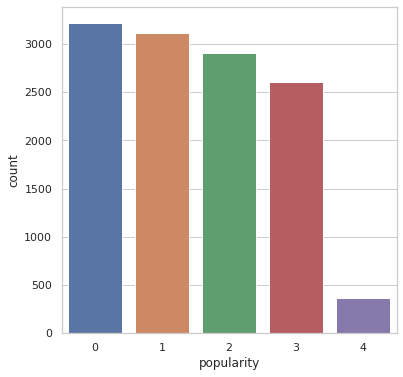

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='popularity',y='count',data=scores)
plt.show()

In [ ]:
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,Year_bucket,released_month,Duration_bucket
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,0,1920-1947,1,2.7-3.0
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,1,2017-2021,11,2.3-2.7
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,0,1947-1960,1,2.3-2.7
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,1,1970-1979,4,2.3-2.7
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,2,1970-1979,1,3.3-3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,2,2012-2017,7,3.3-3.6
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,4,1947-1960,1,0.2-2.3
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,1,1979-1987,1,2.3-2.7
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,3,2012-2017,1,3.0-3.3


In [ ]:
df_Processed = pd.concat([df ,pd.get_dummies(df['released_month'], prefix='released_month', drop_first=True) ],axis=1)
df_Processed.drop(['released_month'],axis=1, inplace=True)

df_Processed = pd.concat([df_Processed ,pd.get_dummies(df_Processed['key'], prefix='key', drop_first=True) ],axis=1)
df_Processed.drop(['key'],axis=1, inplace=True)

df_Processed = pd.concat([df_Processed ,pd.get_dummies(df_Processed['Year_bucket'], prefix='Year_bucket', drop_first=True) ],axis=1)
df_Processed.drop(['Year_bucket'],axis=1, inplace=True)

df_Processed = pd.concat([df_Processed ,pd.get_dummies(df_Processed['Duration_bucket'], prefix='Duration_bucket', drop_first=True) ],axis=1)
df_Processed.drop(['Duration_bucket'],axis=1, inplace=True)

df_Processed = pd.concat([df_Processed ,pd.get_dummies(df_Processed['explicit'], prefix='explicit', drop_first=True) ],axis=1)
df_Processed.drop(['explicit'],axis=1, inplace=True)
df_Processed.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'duration-min', 'popularity', 'released_month_2',
       'released_month_3', 'released_month_4', 'released_month_5',
       'released_month_6', 'released_month_7', 'released_month_8',
       'released_month_9', 'released_month_10', 'released_month_11',
       'released_month_12', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'Year_bucket_1947-1960', 'Year_bucket_1960-1970',
       'Year_bucket_1970-1979', 'Year_bucket_1979-1987',
       'Year_bucket_1987-1995', 'Year_bucket_1995-2003',
       'Year_bucket_2003-2012', 'Year_bucket_2012-2017',
       'Year_bucket_2017-2021', 'Duration_bucket_2.3-2.7',
       'Duration_bucket_2.7-3.0', 'Duration_bucket_3.0-3.3',
       'Duration_bucket_3.3-3.6', 'Duration_bucket_3.6-3.8',
       'Duration_bucke

In [ ]:
df_Processed = pd.concat([df_Processed ,pd.get_dummies(df_Processed['mode'], prefix='mode', drop_first=True) ],axis=1)
df_Processed.drop(['mode'],axis=1, inplace=True)
df_Processed.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'duration-min', 'popularity', 'released_month_2',
       'released_month_3', 'released_month_4', 'released_month_5',
       'released_month_6', 'released_month_7', 'released_month_8',
       'released_month_9', 'released_month_10', 'released_month_11',
       'released_month_12', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'Year_bucket_1947-1960', 'Year_bucket_1960-1970',
       'Year_bucket_1970-1979', 'Year_bucket_1979-1987',
       'Year_bucket_1987-1995', 'Year_bucket_1995-2003',
       'Year_bucket_2003-2012', 'Year_bucket_2012-2017',
       'Year_bucket_2017-2021', 'Duration_bucket_2.3-2.7',
       'Duration_bucket_2.7-3.0', 'Duration_bucket_3.0-3.3',
       'Duration_bucket_3.3-3.6', 'Duration_bucket_3.6-3.8',
       'Duration_bucket_3.8-4.

In [ ]:
test_Processed = pd.concat([test ,pd.get_dummies(test['released_month'], prefix='released_month', drop_first=True) ],axis=1)
test_Processed.drop(['released_month'],axis=1, inplace=True)

test_Processed = pd.concat([test_Processed ,pd.get_dummies(test_Processed['key'], prefix='key', drop_first=True) ],axis=1)
test_Processed.drop(['key'],axis=1, inplace=True)

test_Processed = pd.concat([test_Processed ,pd.get_dummies(test_Processed['Year_bucket'], prefix='Year_bucket', drop_first=True) ],axis=1)
test_Processed.drop(['Year_bucket'],axis=1, inplace=True)

test_Processed = pd.concat([test_Processed ,pd.get_dummies(test_Processed['Duration_bucket'], prefix='Duration_bucket', drop_first=True) ],axis=1)
test_Processed.drop(['Duration_bucket'],axis=1, inplace=True)

test_Processed = pd.concat([test_Processed ,pd.get_dummies(test_Processed['explicit'], prefix='explicit', drop_first=True) ],axis=1)
test_Processed.drop(['explicit'],axis=1, inplace=True)


test_Processed = pd.concat([test_Processed ,pd.get_dummies(test_Processed['mode'], prefix='mode', drop_first=True) ],axis=1)
test_Processed.drop(['mode'],axis=1, inplace=True)

test_Processed=test_Processed.drop(["id","release_date","year","duration-min"],axis=1)
test_Processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acousticness              4000 non-null   float64
 1   danceability              4000 non-null   float64
 2   energy                    4000 non-null   float64
 3   instrumentalness          4000 non-null   float64
 4   liveness                  4000 non-null   float64
 5   loudness                  4000 non-null   float64
 6   speechiness               4000 non-null   float64
 7   tempo                     4000 non-null   float64
 8   valence                   4000 non-null   float64
 9   released_month_2          4000 non-null   uint8  
 10  released_month_3          4000 non-null   uint8  
 11  released_month_4          4000 non-null   uint8  
 12  released_month_5          4000 non-null   uint8  
 13  released_month_6          4000 non-null   uint8  
 14  released

In [ ]:
X_test=test_Processed


In [ ]:
df_Processed=df_Processed.drop(["id","release_date","year","duration-min"],axis=1)
df_Processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acousticness              12227 non-null  float64
 1   danceability              12227 non-null  float64
 2   energy                    12227 non-null  float64
 3   instrumentalness          12227 non-null  float64
 4   liveness                  12227 non-null  float64
 5   loudness                  12227 non-null  float64
 6   speechiness               12227 non-null  float64
 7   tempo                     12227 non-null  float64
 8   valence                   12227 non-null  float64
 9   popularity                12227 non-null  int64  
 10  released_month_2          12227 non-null  uint8  
 11  released_month_3          12227 non-null  uint8  
 12  released_month_4          12227 non-null  uint8  
 13  released_month_5          12227 non-null  uint8  
 14  releas

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


Y = df_Processed["popularity"].values
X = df_Processed.loc[:, df_Processed.columns != 'popularity'].values

x_train, x_val, y_train, y_val = train_test_split(X, Y,test_size=.25,random_state=42)





/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


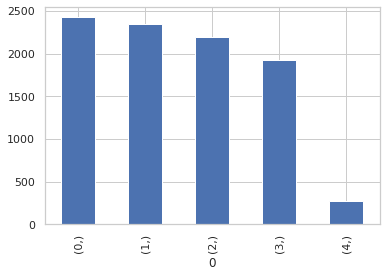

In [ ]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

In [ ]:
print("Before oversampling the minor label in the train set")
print(pd.DataFrame(y_train).value_counts())

oversample = RandomOverSampler(sampling_strategy={4:500})

x_train, y_train = oversample.fit_resample(x_train, y_train)

print("After oversampling the minor label in the train set")
print(pd.DataFrame(y_train).value_counts())

Before oversampling the minor label in the train set
0    2428
1    2348
2    2189
3    1928
4     277
dtype: int64
After oversampling the minor label in the train set
0    2428
1    2348
2    2189
3    1928
4     500
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Train Validation Split 
 #### For training and cross validating model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,f1_score,precision_score
from sklearn.model_selection import train_test_split

### Script for hyperparameter tuning

1.   List item
2.   List item



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from yellowbrick.model_selection import feature_importances

#===============================================================================================#

# Classification Models Class

#===============================================================================================#

class Classification():
    
    """
    This class is for performing classifcation algorithms such as Logistic Regression, Decision Tree, Random Forest, and SVM.
    
    Parameters
    ----------
    model_type: 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'
    the type of classifcation algorithm you would like to apply 
    
    x_train: dataframe
    the independant variables of the training data
    
    x_val: dataframe
    the independant variables of the validation data
    
    y_train: series
    the target variable of the training data
    
    y_val: series
    the target variable of the validation data
    
    """
    
    def __init__(self,model_type,x_train,x_val,y_train,y_val):

        self.model_type = model_type
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        self.feature_importances = pd.DataFrame()
        self.name = self
        
        if self.model_type == 'Logistic Regression':
            self.technique = LogisticRegression(fit_intercept=False)
        elif self.model_type == 'Decision Tree':
            self.technique = DecisionTreeClassifier(random_state=42)
        elif self.model_type == 'Random Forest':
            self.technique = RandomForestClassifier(n_jobs=-1,random_state=42)
        elif self.model_type == 'SVM':
            self.technique = SVC()
        elif self.model_type == 'Naive Bayes':
            self.technique = GaussianNB()
        elif self.model_type == 'KNN':
            self.technique = KNeighborsClassifier(n_jobs=-1)
            
#===============================================================================================#

# Score Function

#===============================================================================================#

    def scores(self,model,x_train,x_val,y_train,y_val):
        
        """
        Gets the accuracy for the given data and creates a dataframe containing scores.
        Parameters
        ----------
        model: 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'
        the type of classifcation applied
        x_train: dataframe
        the independant variables of the training data
        x_val: dataframe
        the independant variables of the validation data
        y_train: series
        the target variable of the training data
        y_val: series
        the target variable of the validation data
        
        Returns
        ----------
        scores_table: a dataframe with the model used, the train accuracy and validation accuracy
        """
        
        self.acc_train = self.best_model.score(x_train,y_train)
        self.acc_val = self.best_model.score(x_val,y_val)
        
        d = {'Model Name': [self.model_type],
             'Train Accuracy': [self.acc_train], 
             'Validation Accuracy': [self.acc_val],
             'Accuracy Difference':[self.acc_train-self.acc_val]}
        self.scores_table = pd.DataFrame(data=d)
        
        return self.scores_table


#===============================================================================================#

# Get Scores Function

#===============================================================================================#

    def get_scores(self,params,cv_type):
        
        """
        Performs a gridsearch cross validation with given hyperparameters and data.
        Gets the accuracy for the given data and creates a dataframe containing scores.
        Parameters
        ----------
        param_grid: dictionary 
        specified hyperparameters for chosen classification algorithm to be passed through gridsearch cross validation
        
        cv_type: 'skf'
        the type of cross validation split to be used for gridsearch
        """
        
        classifier = self.technique
        fit_classifier = classifier.fit(self.x_train,self.y_train)
        opt_model = GridSearchCV(fit_classifier,
                                 params,
                                 cv=cv_type,
                                 scoring='accuracy',
                                 return_train_score=True,
                                 n_jobs=-1)
        self.opt_model = opt_model.fit(self.x_train,self.y_train) 
        self.best_model = opt_model.best_estimator_
        self.scores = Classification.scores(self,self.best_model,self.x_train,self.x_val,self.y_train,self.y_val)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        if params == {}:
            pass
        else:
            print("The best hyperparameters are: ", self.best_params,'\n')
        self.y_validated = self.best_model.predict(self.x_val)
        self.classification_report = pd.DataFrame.from_dict(classification_report(self.y_val,self.y_validated,output_dict=True)).iloc[0:3,0:5]
        return self.classification_report

#===============================================================================================#

# Feature Importance Function

#===============================================================================================#
   
    def get_feature_importances(self):
        
        """
        Create a confusion matrix.
        Returns
        ----------
        feature_importances_bar : a bar chart with feature importance of given model
        """
        if (self.model_type == 'Decision Tree') or (self.model_type == 'Random Forest') or (self.model_type == 'SVM'):    
            self.feature_importances_table = pd.DataFrame(self.best_model.feature_importances_,
                                                    index = self.x_train.columns,
                                                    columns=['Importance']).sort_values('Importance',ascending =False)
            plt.figure(figsize=(9,7.5))
            self.feature_importances_bar = sns.barplot(y= self.feature_importances_table.index[:15], x= self.feature_importances_table['Importance'][:15])
            plt.show()
            return self.feature_importances_bar
        
        else:
            return print('This classification method does not have the attribute feature importance.')

#===============================================================================================#

# Confusion Matrix Function

#===============================================================================================#

    def conf_matrix(self):
        
        """
        Create a confusion matrix.
        
        Returns
        ----------
        scores_table: a confusion matrix
        """
        
        plt.figure(figsize=(9,9))
        ax = sns.heatmap(confusion_matrix(self.y_val, self.y_validated),
                         annot= True, 
                         fmt = '.4g', 
                         cbar=0,
                         xticklabels=[1,2,3,4,5],
                         yticklabels=[1,2,3,4,5])
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()



#===============================================================================================#

# Test Score Function

#===============================================================================================#

    def get_test_scores(self,X_test,y_test):
        
        """
        Gets a ROC AUC score for given data and creates a dataframe containing scores.
        Creates a ROC plot.
        
        Parameters
        ----------
        x_test: dataframe 
        independant variables of the test data
        
        y_test: dataframe 
        target variable of the test data
        """
            
        self.y_test = y_test
        self.x_test = X_test
        self.scores_table = pd.DataFrame()
        self.test_scores = Classification.scores(self,self.best_model,self.x_train,self.x_test,self.y_train,self.y_test)
        display(self.scores_table)
        self.y_tested = self.best_model.predict(self.x_test)
        self.test_classification_report = pd.DataFrame.from_dict(classification_report(self.y_test,self.y_tested,output_dict=True)).iloc[0:3,0:5]
        
        return self.test_classification_report
    
#===============================================================================================#

# Show Test Confusion Matrix Function

#===============================================================================================#

    def test_conf_matrix(self):
        
        """
        Create a confusion matrix for the test data.
        
        Returns
        ----------
        scores_table: a confusion matrix
        """
        plt.figure(figsize=(9,9))
        ax = sns.heatmap(confusion_matrix(self.y_test, self.y_tested),
                         annot= True, 
                         fmt = '.4g', 
                         cbar=0,
                         xticklabels=[1,2,3,4,5],
                         yticklabels=[1,2,3,4,5])
        ax.set(xlabel='Predicted', ylabel='True')
        plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost.sklearn import XGBClassifier

#===============================================================================================#

# Ensemble Models Class

#===============================================================================================#

class Ensemble(Classification):
    
    """
    This class is for performing ensemble algorithms such as voting, adaboost, xgboost, or stacking.
    
    Parameters
    ----------
    ensemble_method: 'Voting', 'AdaBoost', 'XGBoost', 'Stacking'
    the type of ensemble algorithm you would like to apply
    
    estimators: list
    the classifcation models to be used by the ensemble algorithm
    
    x_train: dataframe
    the independant variables of the training data
    
    x_val: dataframe
    the independant variables of the validation data
    
    y_train: series
    the target variable of the training data
    
    y_val: series
    the target variable of the validation data
    
    """
    
    def __init__(self, ensemble_method, estimators, X_train, X_val, y_train, y_val):
        
        self.ensemble_method = ensemble_method
        self.x_train = X_train
        self.y_train = y_train
        self.x_val = X_val
        self.y_val = y_val
        self.model_type = ensemble_method
        self.scores_table = pd.DataFrame()
        
        if self.ensemble_method == "Voting":
            self.technique = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
        elif self.ensemble_method == "AdaBoost":
            self.technique = AdaBoostClassifier(estimators, algorithm='SAMME')
        elif self.ensemble_method == "XGBoost":
            self.technique = XGBClassifier(n_jobs=-1)
        elif self.ensemble_method == "Stacking":
            self.technique = StackingClassifier(estimators)

In [ ]:
from sklearn.model_selection import  StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

Decision Tree

In [ ]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,4,5,6,7,8,9]}
dec_tree_1 = Classification('Decision Tree',x_train,x_val,y_train,y_val)
dec_tree_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.632705,0.586196,0.04651


The best hyperparameters are:  {'max_depth': 8, 'min_samples_leaf': 3} 



,0,1,2,3,4
precision,0.753769,0.537623,0.494978,0.591241,0.303030
recall,0.755668,0.640260,0.477178,0.477876,0.326087
f1-score,0.754717,0.584469,0.485915,0.528548,0.314136


In [ ]:
params = {'min_samples_leaf':[3,4,5],
          'max_depth':[7,8,9,10]}
dec_tree_2 = Classification('Decision Tree',x_train,x_val,y_train,y_val)
dec_tree_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.632705,0.586196,0.04651


The best hyperparameters are:  {'max_depth': 8, 'min_samples_leaf': 3} 



,0,1,2,3,4
precision,0.753769,0.537623,0.494978,0.591241,0.303030
recall,0.755668,0.640260,0.477178,0.477876,0.326087
f1-score,0.754717,0.584469,0.485915,0.528548,0.314136


Random Forest

array([[1.10e-01, 7.81e-01, 5.22e-01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [9.58e-02, 6.53e-01, 3.40e-01, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [5.40e-04, 6.48e-01, 7.40e-01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [9.95e-01, 3.52e-01, 2.17e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.55e-01, 3.69e-01, 5.58e-01, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [2.89e-03, 6.44e-01, 5.48e-01, ..., 0.00e+00, 1.00e+00, 1.00e+00]])

In [ ]:
params = {'min_samples_leaf':[7], 'n_estimators':[50],
          'max_depth':[17]}
ran_for_1 = Classification('Random Forest',x_train,x_val,y_train,y_val)
ran_for_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.724156,0.607458,0.116698


The best hyperparameters are:  {'max_depth': 17, 'min_samples_leaf': 7, 'n_estimators': 50} 



,0,1,2,3,4
precision,0.773171,0.545641,0.499182,0.607973,0.408163
recall,0.798489,0.690909,0.421853,0.539823,0.217391
f1-score,0.785626,0.609742,0.457271,0.571875,0.283688


In [ ]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14],'n_estimators':[10,50,100],
          'max_depth':[13,14,15,16,17,18]}
ran_for_2 = Classification('Random Forest',x_train,x_val,y_train,y_val)
ran_for_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.713617,0.610729,0.102887


The best hyperparameters are:  {'max_depth': 18, 'min_samples_leaf': 9, 'n_estimators': 100} 



,0,1,2,3,4
precision,0.774786,0.548420,0.504839,0.613176,0.425532
recall,0.797229,0.698701,0.432918,0.535398,0.217391
f1-score,0.785847,0.614506,0.466121,0.571654,0.287770


Logistic Regression

In [ ]:
params = {'penalty':['l1','l2'],
          'C':[0.01,0.05,0.1,0.5,1,5,10]}
log_reg_1 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)
log_reg_1.get_scores(params,skf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.577025,0.58227,-0.005245


The best hyperparameters are:  {'C': 0.5, 'penalty': 'l2'} 



,0,1,2,3,4
precision,0.730722,0.554939,0.483405,0.538462,0.555556
recall,0.751889,0.649351,0.463347,0.505900,0.054348
f1-score,0.741155,0.598444,0.473164,0.521673,0.099010


In [ ]:
params = {'penalty':['l1','l2'],
          'C':[0.3,0.4,0.5,0.6,0,7]}
log_reg_2 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)
log_reg_2.get_scores(params,skf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.577345,0.58227,-0.004925


The best hyperparameters are:  {'C': 0.3, 'penalty': 'l2'} 



,0,1,2,3,4
precision,0.730627,0.555310,0.484892,0.537736,0.555556
recall,0.748111,0.651948,0.466113,0.504425,0.054348
f1-score,0.739266,0.599761,0.475317,0.520548,0.099010


In [ ]:
params = {'penalty':['l2'],
          'C':[0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32]}
log_reg_3 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)
log_reg_3.get_scores(params,skf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.577132,0.582924,-0.005793


The best hyperparameters are:  {'C': 0.27, 'penalty': 'l2'} 



,0,1,2,3,4
precision,0.725061,0.555310,0.488987,0.540373,0.500000
recall,0.750630,0.651948,0.460581,0.513274,0.032609
f1-score,0.737624,0.599761,0.474359,0.526475,0.061224


Support Vector Machines

In [ ]:
params = {'kernel':['poly'],
          'degree':[2,3]}
svm_1 = Classification('SVM',x_train,x_val,y_train,y_val)
svm_1.get_scores(params,skf)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.375705,0.383382,-0.007677


The best hyperparameters are:  {'degree': 2, 'kernel': 'poly'} 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4
precision,0.438078,0.401899,0.296559,0.414307,0.0
recall,0.596977,0.164935,0.405256,0.410029,0.0
f1-score,0.505330,0.233886,0.342490,0.412157,0.0


Guassian Naive Bayes

In [ ]:

params = {'var_smoothing':[1e-02,1e-01,1]}
gnb_2 = Classification('Naive Bayes',x_train,x_val,y_train,y_val)
gnb_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Naive Bayes,0.379538,0.370298,0.00924


The best hyperparameters are:  {'var_smoothing': 0.01} 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4
precision,0.458333,0.367816,0.257036,0.361720,0.0
recall,0.471033,0.249351,0.189488,0.632743,0.0
f1-score,0.464596,0.297214,0.218153,0.460300,0.0


KNN

In [ ]:
params = {'n_neighbors':[5,10,50,100,200,300]}

knn_1 = Classification('KNN',x_train,x_val,y_train,y_val)
knn_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.550942,0.440301,0.110641


The best hyperparameters are:  {'n_neighbors': 10} 



,0,1,2,3,4
precision,0.483290,0.406609,0.370618,0.484171,0.293103
recall,0.710327,0.367532,0.307054,0.383481,0.184783
f1-score,0.575217,0.386085,0.335855,0.427984,0.226667


In [ ]:
params = {'n_neighbors':[250,300,350]}
knn_2 = Classification('KNN',x_train,x_val,y_train,y_val)

knn_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.398488,0.390906,0.007582


The best hyperparameters are:  {'n_neighbors': 250} 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4
precision,0.473618,0.362473,0.300518,0.386339,0.0
recall,0.474811,0.441558,0.160443,0.533923,0.0
f1-score,0.474214,0.398126,0.209197,0.448297,0.0


In [ ]:
params = {'n_neighbors':[340,345,350,355,360]}
knn_3 = Classification('KNN',x_train,x_val,y_train,y_val)

knn_3.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.391462,0.386981,0.004481


The best hyperparameters are:  {'n_neighbors': 340} 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4
precision,0.473890,0.352442,0.313869,0.382729,0.0
recall,0.457179,0.431169,0.178423,0.529499,0.0
f1-score,0.465385,0.387850,0.227513,0.444307,0.0


Adaboost (log_reg_2)

In [ ]:
params = {'learning_rate':[0.1,1,10]}

adaboost_1 = Ensemble('AdaBoost',log_reg_2.best_model,x_train,x_val,y_train,y_val)
adaboost_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,AdaBoost,0.468647,0.456984,0.011663


The best hyperparameters are:  {'learning_rate': 1} 



,0,1,2,3,4
precision,0.553145,0.456422,0.399433,0.471322,0.115385
recall,0.642317,0.516883,0.390041,0.278761,0.195652
f1-score,0.594406,0.484775,0.394682,0.350324,0.145161


In [ ]:

params = {'learning_rate':[0.01,0.05,0.1]}

adaboost_2 = Ensemble('AdaBoost',log_reg_2.best_model,x_train,x_val,y_train,y_val)
adaboost_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,AdaBoost,0.442351,0.443245,-0.000894


The best hyperparameters are:  {'learning_rate': 0.1} 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4
precision,0.670807,0.441731,0.302703,0.417376,0.0
recall,0.544081,0.516883,0.387275,0.361357,0.0
f1-score,0.600834,0.476361,0.339806,0.387352,0.0


XGBoost (log_reg_2)

In [ ]:
params = {'eta':[0.001,0.005,0.1,0.5],
          'min_child_weight':[1,5,10]}
xgboost_1 = Ensemble('XGBoost',log_reg_2.best_model,x_train,x_val,y_train,y_val)
xgboost_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,XGBoost,0.632279,0.604187,0.028092


The best hyperparameters are:  {'eta': 0.001, 'min_child_weight': 10} 



,0,1,2,3,4
precision,0.765432,0.550999,0.496988,0.620321,0.352113
recall,0.780856,0.680519,0.456432,0.513274,0.271739
f1-score,0.773067,0.608948,0.475847,0.561743,0.306748


In [ ]:

params = {'eta':[0.0001,0.0005,0.001],
          'min_child_weight':[5]}
xgboost_2 = Ensemble('XGBoost',log_reg_1.best_model,x_train,x_val,y_train,y_val)
xgboost_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,XGBoost,0.634196,0.601897,0.032298


The best hyperparameters are:  {'eta': 0.0001, 'min_child_weight': 5} 



,0,1,2,3,4
precision,0.761267,0.550694,0.493192,0.617857,0.346154
recall,0.787154,0.670130,0.450899,0.510324,0.293478
f1-score,0.773994,0.604569,0.471098,0.558966,0.317647


Voting (Adaboost(log_reg_2)/Logistic Regression)

In [ ]:
params = {'voting':['hard','soft']}

adaboost_best = ('ada', adaboost_2.best_model)
log_reg_best = ('lr2', log_reg_3.best_model)
ran_best=('ran', ran_for_2.best_model)
xg_best=('xgb', xgboost_1.best_model)

estimators = [adaboost_best,log_reg_best, ran_best, xg_best ]
voting = Ensemble('Voting',estimators,x_train,x_val,y_train,y_val)

voting.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Voting,0.643032,0.606477,0.036555


The best hyperparameters are:  {'voting': 'soft'} 



,0,1,2,3,4
precision,0.764417,0.556391,0.497041,0.598684,0.481481
recall,0.784635,0.672727,0.464730,0.536873,0.141304
f1-score,0.774394,0.609053,0.480343,0.566096,0.218487


Stacking (Adaboost(log_reg_2)/Logistic Regression)

In [ ]:
adaboost_best = ('ada', adaboost_2.best_model)
log_reg_best = ('lr2', log_reg_3.best_model)
ran_best=('ran', ran_for_2.best_model)
xg_best=('xgb', xgboost_1.best_model)

estimators = [adaboost_best,log_reg_best, ran_best, xg_best ]
stacking = Ensemble('Stacking',estimators,x_train,x_val,y_train,y_val)
stacking.get_scores({},skf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stacking,0.675077,0.608767,0.06631


,0,1,2,3,4
precision,0.777640,0.553684,0.498462,0.610544,0.406250
recall,0.788413,0.683117,0.448133,0.529499,0.282609
f1-score,0.782989,0.611628,0.471959,0.567141,0.333333


Taking out best models

In [ ]:
all_models = pd.concat([dec_tree_1.scores_table,
                        ran_for_2.scores_table,
                        log_reg_3.scores_table,
                        svm_1.scores_table,
                        gnb_2.scores_table,
                        knn_1.scores_table,
                        adaboost_2.scores_table,
                        xgboost_2.scores_table,
                        voting.scores_table,
                        stacking.scores_table],
                        axis=0)

In [ ]:
all_models

We chose a model with highest validation error and with minimum gap between Test accuracy and Validation accuracy

In [ ]:
best_model=ran_for_2

### Evaluation

In [ ]:
best_model.get_test_scores(X,Y)

In [ ]:
best_model.classification_report

In [ ]:
best_model.conf_matrix()

In [ ]:
best_model=dec_tree_1

In [ ]:
best_model.get_test_scores(X_over,Y_over)

In [ ]:
best_model.classification_report

In [ ]:
best_model.conf_matrix()

In [ ]:
best_model=ran_for_2
best_model.get_test_scores(X_over,Y_over)

In [ ]:
best_model.classification_report

In [ ]:
best_model.conf_matrix()

### Testing data

In [ ]:
test = pd.read_csv(Test_data)
test.info()

In [ ]:
test['explicit']= pd.factorize(test.explicit)[0]


In [ ]:
test["Year_bucket"]=pd.cut(test["year"],bins = [0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10],
                         labels=["1920-1947","1947-1960","1960-1970", "1970-1979","1979-1987","1987-1995","1995-2003","2003-2012","2012-2017","2017-2021"])

In [ ]:
test.info()

In [ ]:
'max_depth': 17, 'min_samples_leaf': 7, 
'n_estimators': 50


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier3= RandomForestClassifier(max_depth= 17, min_samples_leaf= 7, n_estimators= 50)
Classifier3.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,Classifier3.predict(x_val))

0.6107294733398757

In [ ]:
accuracy_score(Y,Classifier3.predict(X))

0.7009078269403779

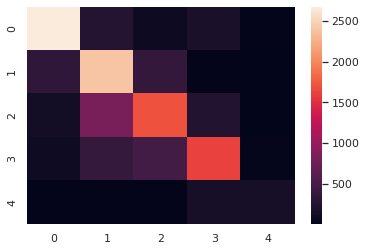

In [ ]:
sns.heatmap(confusion_matrix(Y,Classifier3.predict(X)))

In [ ]:
y_pred=Classifier3.predict(X_test)

In [ ]:
y_pred

In [ ]:
X_test

In [ ]:
X_test["pred"]=y_pred
X_test.to_excel("test_with_pred.xlsx")